<a href="https://colab.research.google.com/github/deepakdogra/AI-ML/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score,f1_score,precision_recall_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
tf.__version__

'2.12.0'

In [117]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Part A - Q1 A** - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [118]:
project_path = '/content/drive/MyDrive/Greatlearning/Neural Network/Project/'

In [119]:
file1 = project_path + 'Signal.csv'

In [120]:
data = pd.read_csv(file1)

In [121]:
data.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [123]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [124]:
data['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

**Part A - Q1 B** - Check for missing values and print percentage for each attribute.

In [125]:
(data.isnull().sum()/data.sum()) * 100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

**Part A - Q1 C **- Check for presence of duplicate records in the dataset and impute with appropriate method.

In [126]:
print(data[data.duplicated() == 1].count())
dataNew = data.drop_duplicates()

print(data.info())
print(dataNew.info())

Parameter 1        240
Parameter 2        240
Parameter 3        240
Parameter 4        240
Parameter 5        240
Parameter 6        240
Parameter 7        240
Parameter 8        240
Parameter 9        240
Parameter 10       240
Parameter 11       240
Signal_Strength    240
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  S

**Part A - Q1 D **- Visualise distribution of the target variable.

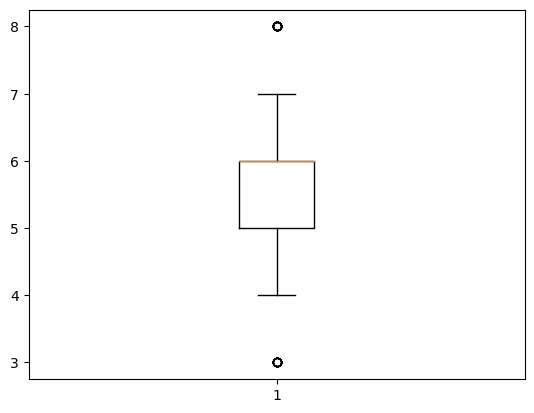

In [127]:
plt.boxplot(data=dataNew,x='Signal_Strength');

# there are two outliers at 3 & 8 other than that most of the values lies in b/w 5 & 6

In [128]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


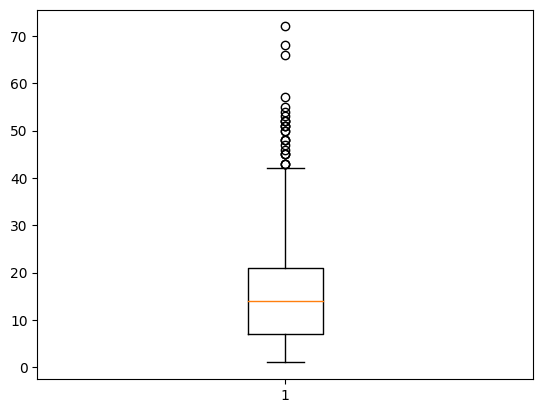

In [129]:
plt.boxplot(data=dataNew,x='Parameter 6');

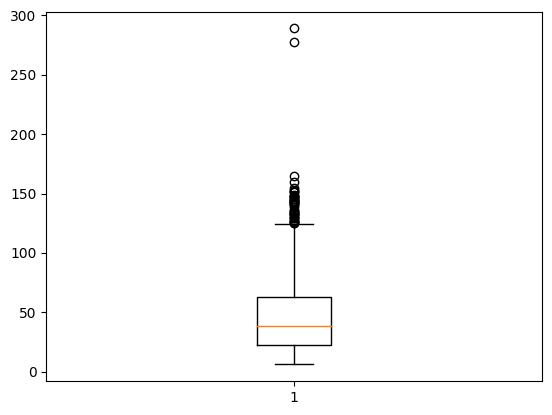

In [130]:
plt.boxplot(data=dataNew,x='Parameter 7');

***Part A - Q1 E - ***Share insights from the initial data analysis (at least 2).

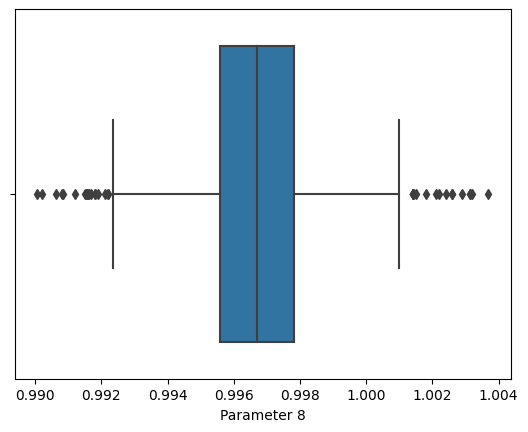

In [131]:
sns.boxplot(data=dataNew,x='Parameter 8');
#Insights
# Most of thee Parameter 1,2 4,5, 6 & 7  are skewed towards right with lot of outliers in the upper region.
# Parameter 8 is normally distributed, however it also has outliers on both sides

**Part A - Q2 A **- Split the data into X & Y.

In [132]:
X= dataNew.drop(columns='Signal_Strength')
Y= dataNew['Signal_Strength']
X.shape

(1359, 11)

**Part A - Q2 B** - Split the data into train & test with 70:30 proportion.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=17,stratify=Y)

**Part A - Q2 C **- Print shape of all the 4 variables and verify if train and test data is in sync.

In [134]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(951, 11)
(951,)
(408, 11)
(408,)


**Part A - Q2 D** - Normalise the train and test data with appropriate method.

In [135]:
#Normalization
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [136]:
X_train

array([[0.10030258, 0.00514711, 0.00409129, ..., 0.04645593, 0.00857851,
        0.12801776],
       [0.12541533, 0.00756181, 0.00571746, ..., 0.0623388 , 0.0118038 ,
        0.18627865],
       [0.29513992, 0.01014543, 0.01598675, ..., 0.10329897, 0.02336524,
        0.38122239],
       ...,
       [0.32950604, 0.01407265, 0.01269971, ..., 0.11120829, 0.01922119,
        0.36039723],
       [0.06792387, 0.00477084, 0.00234499, ..., 0.02547145, 0.00404309,
        0.07358419],
       [0.11924375, 0.01078872, 0.00529972, ..., 0.06454305, 0.01135655,
        0.24227302]])

**Part A - Q2 E **- Transform Labels into format acceptable by Neural Network

In [137]:
#transform label into format acceptable by neural network

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [138]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

***Part A - Q3 A ***- Design a Neural Network to train a classifier.

In [139]:
#Design Neural Network

model = Sequential()
model.add(Dense(50, input_shape=(11,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(9))
model.add(Activation('softmax'))

***Part A - Q3 B ***- Train the classifier using previously designed Architecture

In [140]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss=losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 50)                600       
                                                                 
 activation_30 (Activation)  (None, 50)                0         
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
 activation_31 (Activation)  (None, 50)                0         
                                                                 
 dense_32 (Dense)            (None, 50)                2550      
                                                                 
 activation_32 (Activation)  (None, 50)                0         
                                                                 
 dense_33 (Dense)            (None, 50)               

In [141]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [142]:
hist = model.fit(X_train,y_train,validation_split=0.2, batch_size=100, epochs= 30, verbose= 2,callbacks = callbacks)

Epoch 1/30

Epoch 1: saving model to model_weights.h5
8/8 - 1s - loss: 2.0392 - accuracy: 0.0105 - val_loss: 1.9909 - val_accuracy: 0.0209 - lr: 0.0010 - 847ms/epoch - 106ms/step
Epoch 2/30

Epoch 2: saving model to model_weights.h5
8/8 - 0s - loss: 2.0111 - accuracy: 0.0105 - val_loss: 1.9631 - val_accuracy: 0.0209 - lr: 0.0010 - 76ms/epoch - 9ms/step
Epoch 3/30

Epoch 3: saving model to model_weights.h5
8/8 - 0s - loss: 1.9842 - accuracy: 0.0105 - val_loss: 1.9365 - val_accuracy: 0.0209 - lr: 0.0010 - 63ms/epoch - 8ms/step
Epoch 4/30

Epoch 4: saving model to model_weights.h5
8/8 - 0s - loss: 1.9584 - accuracy: 0.0105 - val_loss: 1.9107 - val_accuracy: 0.0209 - lr: 0.0010 - 61ms/epoch - 8ms/step
Epoch 5/30

Epoch 5: saving model to model_weights.h5
8/8 - 0s - loss: 1.9335 - accuracy: 0.0105 - val_loss: 1.8862 - val_accuracy: 0.0209 - lr: 0.0010 - 70ms/epoch - 9ms/step
Epoch 6/30

Epoch 6: saving model to model_weights.h5
8/8 - 0s - loss: 1.9097 - accuracy: 0.0105 - val_loss: 1.8626 -

In [143]:
results = model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1.5472 - accuracy: 0.4240


In [144]:
print('Test accuracy: ', results[1])

Test accuracy:  0.42401960492134094


***Part A - Q3 C ***- Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

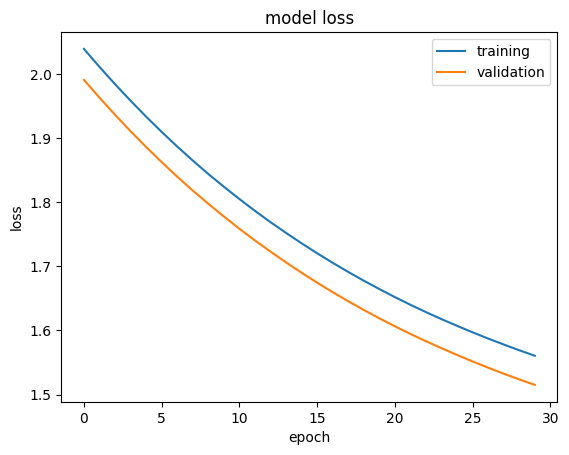

In [145]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

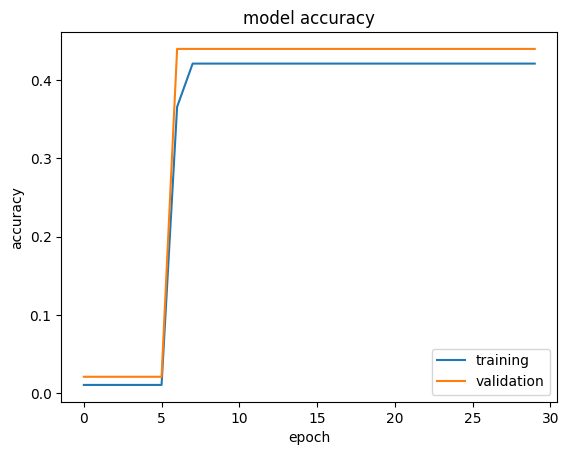

In [146]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

***Part A - Q3 D ***- Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [147]:
#update Existing architecture
modelnew = Sequential()
modelnew.add(Dense(50, input_shape=(11,)))
# modelnew.add(BatchNormalization())
modelnew.add(Activation('relu'))
# modelnew.add(Dropout(0.2))
modelnew.add(Dense(50))
# modelnew.add(BatchNormalization())
modelnew.add(Activation('relu'))
# modelnew.add(Dropout(0.2))
modelnew.add(Dense(50))
# modelnew.add(BatchNormalization())
modelnew.add(Activation('relu'))
# modelnew.add(Dropout(0.2))
modelnew.add(Dense(50))
# modelnew.add(BatchNormalization())
modelnew.add(Activation('relu'))
modelnew.add(Dropout(0.5))
modelnew.add(BatchNormalization())
modelnew.add(Dense(9))
modelnew.add(Activation('softmax'))

adam = optimizers.Adam(learning_rate=0.001)
modelnew.compile(optimizer=adam, loss=losses.categorical_crossentropy, metrics=['accuracy'])
modelnew.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                600       
                                                                 
 activation_35 (Activation)  (None, 50)                0         
                                                                 
 dense_36 (Dense)            (None, 50)                2550      
                                                                 
 activation_36 (Activation)  (None, 50)                0         
                                                                 
 dense_37 (Dense)            (None, 50)                2550      
                                                                 
 activation_37 (Activation)  (None, 50)                0         
                                                                 
 dense_38 (Dense)            (None, 50)               

In [148]:
checkpointnew = ModelCheckpoint("model_weightsnew.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lrnew = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacksnew = [checkpointnew,reduce_lrnew]

histnew = modelnew.fit(X_train,y_train,validation_split=0.2, batch_size=100, epochs= 30, verbose= 2,callbacks = callbacksnew)

Epoch 1/30

Epoch 1: saving model to model_weightsnew.h5
8/8 - 2s - loss: 2.2426 - accuracy: 0.1355 - val_loss: 2.1578 - val_accuracy: 0.3927 - lr: 0.0010 - 2s/epoch - 222ms/step
Epoch 2/30

Epoch 2: saving model to model_weightsnew.h5
8/8 - 0s - loss: 2.1349 - accuracy: 0.2276 - val_loss: 2.1061 - val_accuracy: 0.4555 - lr: 0.0010 - 96ms/epoch - 12ms/step
Epoch 3/30

Epoch 3: saving model to model_weightsnew.h5
8/8 - 0s - loss: 2.0545 - accuracy: 0.3605 - val_loss: 2.0560 - val_accuracy: 0.4346 - lr: 0.0010 - 112ms/epoch - 14ms/step
Epoch 4/30

Epoch 4: saving model to model_weightsnew.h5
8/8 - 0s - loss: 1.9921 - accuracy: 0.4013 - val_loss: 1.9972 - val_accuracy: 0.4346 - lr: 0.0010 - 99ms/epoch - 12ms/step
Epoch 5/30

Epoch 5: saving model to model_weightsnew.h5
8/8 - 0s - loss: 1.9295 - accuracy: 0.3974 - val_loss: 1.9354 - val_accuracy: 0.4346 - lr: 0.0010 - 120ms/epoch - 15ms/step
Epoch 6/30

Epoch 6: saving model to model_weightsnew.h5
8/8 - 0s - loss: 1.8563 - accuracy: 0.4447

In [149]:
results = modelnew.evaluate(X_test, y_test)


13/13 [==============================] - 0s 2ms/step - loss: 1.2159 - accuracy: 0.5466


In [150]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5465686321258545


***Part A - Q3 E*** - Plot visuals as in Q3.C and share insights about difference observed in both the models.

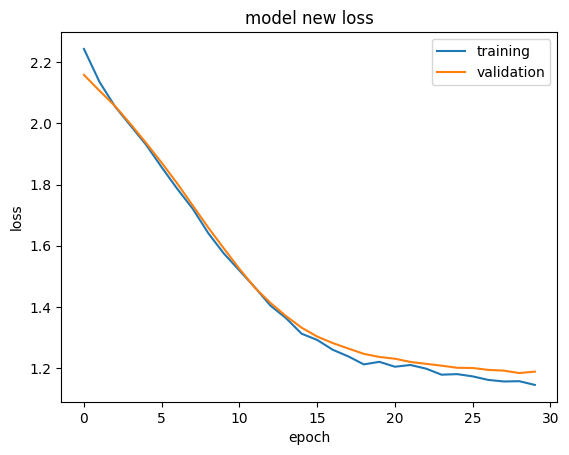

In [151]:
loss, accuracy = modelnew.evaluate(X_test, y_test, verbose=False)

plt.plot(histnew.history['loss'])
plt.plot(histnew.history['val_loss'])
plt.title('model new loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

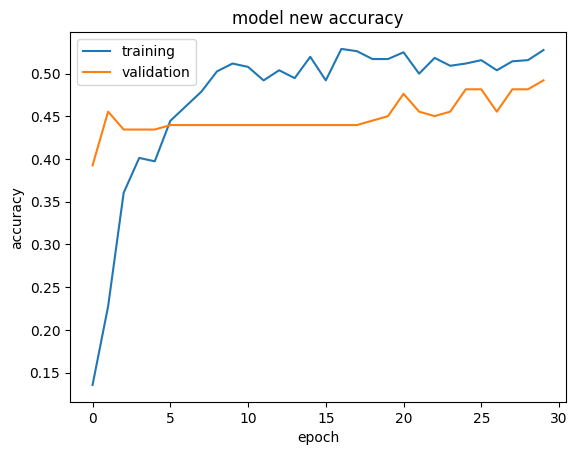

In [152]:
loss, accuracy  = modelnew.evaluate(X_test, y_test, verbose=False)

plt.plot(histnew.history['accuracy'])
plt.plot(histnew.history['val_accuracy'])
plt.title('model new accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

#Summary - Insights <br/>
1. We can observe from our both models that model with batch normalization and dropout is performing similar in terms of misclassifications.
3. Thus we achieved higher accuracy score of 43% to 50%.


***Part B - Q1 A ***- Read the .h5 file and assign to a variable.

In [153]:

# read .h5 file
import h5py
# this is for importing local files  in google colab--start
# import io
# from google.colab import files
# uploaded = files.upload()

# df = df = pd.DataFrame(np.array(h5py.File(io.BytesIO(uploaded['C:\GL\GL\Deep Learning\Project\Autonomous_Vehicles_SVHN_single_grey1.h5']))['variable_1']))
# --end
# file = h5py.File('/content/drive/MyDrive/Greatlearning/Neural Network/Project/Autonomous_Vehicles_SVHN_single_grey1.h5')

# d1 = np.random.random(size = (1000,20))
# d2 = np.random.random(size = (1000,200))
# print(d1.shape)
# print(d2.shape)
hf = h5py.File('/content/drive/MyDrive/Greatlearning/Neural Network/Project/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
# ls=list(file.keys())
# print(ls)


***Part B - Q1 B ***- Print all the keys from the .h5 file.

In [154]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

***Part B - Q1 C*** - Split the data into X_train, X_test, Y_train, Y_test

In [155]:
X_test = np.array(hf.get('X_test'))
X_train = np.array(hf.get('X_train'))
X_val = np.array(hf.get('X_val'))
y_test = np.array(hf.get('y_test'))
y_train = np.array(hf.get('y_train'))
y_val = np.array(hf.get('y_val'))
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

X_train[0][0][0]


(18000, 32, 32)
(42000, 32, 32)
(60000, 32, 32)
(18000,)
(42000,)
(60000,)


33.0704

***Part B - Q2 B ***- Visualise first 10 images in train data and print its corresponding labels.

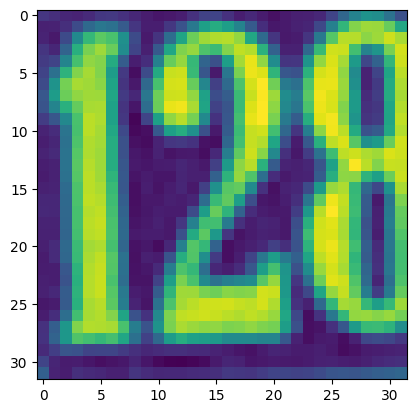

Label:  2


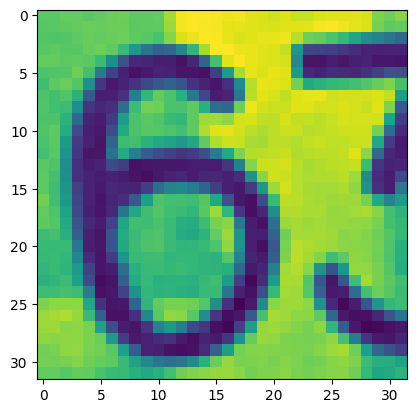

Label:  6


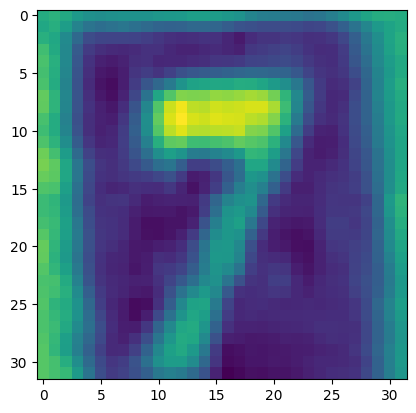

Label:  7


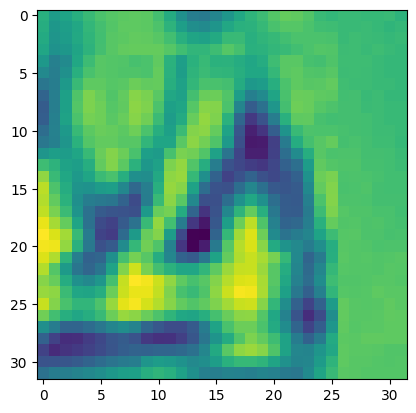

Label:  4


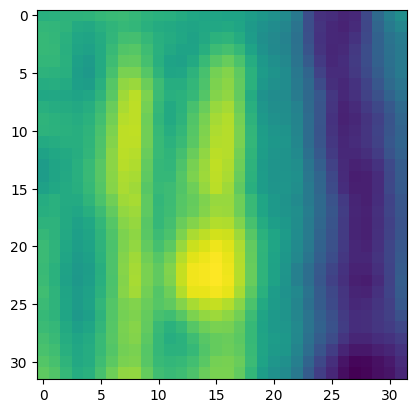

Label:  4


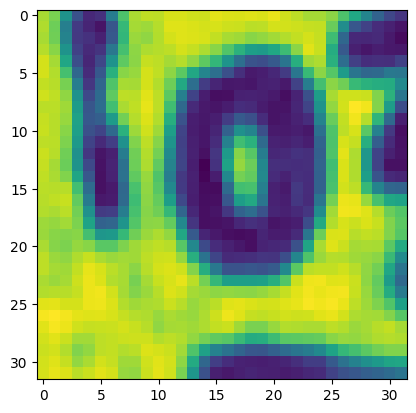

Label:  0


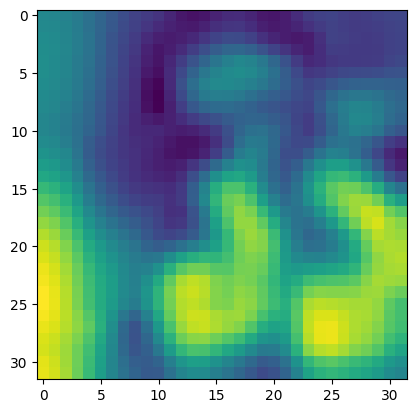

Label:  3


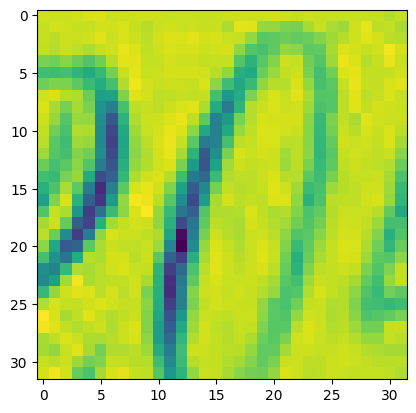

Label:  0


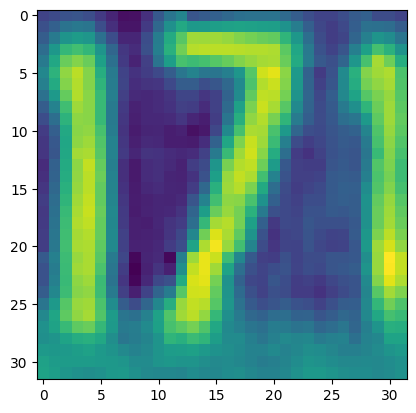

Label:  7


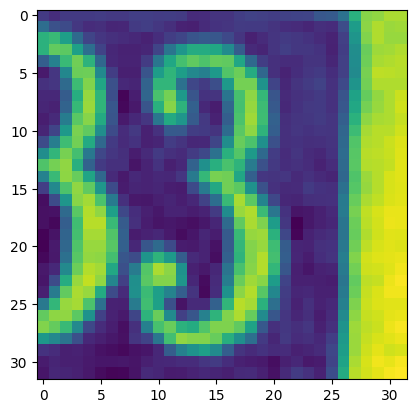

Label:  3


In [156]:
for i in range(0,10):
  plt.imshow(X_train[i])    # show first number in the dataset
  plt.show()
  print('Label: ', y_train[i])

***Part B - Q2 C*** -Reshape all the images with appropriate shape update the data in same variable.

In [157]:
#reshape all the Images

X_train = X_train.reshape((X_train.shape[0],-1))
X_val= X_val.reshape((X_val.shape[0],-1))
X_test= X_test.reshape((X_test.shape[0],-1))

***Part B - Q2 D ***- Normalise the images i.e. Normalise the pixel values.

In [158]:
#Normalization
X_train = preprocessing.normalize(X_train)
X_val = preprocessing.normalize(X_val)
X_test = preprocessing.normalize(X_test)

***Part B - Q2 E ***- Transform Labels into format acceptable by Neural Network

In [159]:
#transform label into format acceptable by neural network
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [160]:
print(X_train.shape,X_val.shape, X_test.shape, y_train.shape, y_val.shape,y_test.shape)

(42000, 1024) (60000, 1024) (18000, 1024) (42000, 10) (60000, 10) (18000, 10)


***Part B - Q2 F*** - Print total Number of classes in the Dataset.

In [161]:
unique_labels = np.unique(y_train)
num_classes_train = len(unique_labels)
print('Total number of classes Train',num_classes_train)

unique_labels_test = np.unique(y_test)
num_classes_test = len(unique_labels_test)
print('Total number of classes Test', num_classes_test)

Total number of classes Train 2
Total number of classes Test 2


***Part B - Q3 A*** - Design a Neural Network to train a classifier.
***Part B - Q3 B ***- Train the classifier using previously designed Architecture (Use best suitable parameters).

In [162]:
#update Existing architecture
modellatest = Sequential()
modellatest.add(Dense(100, input_shape=(1024,)))
modellatest.add(BatchNormalization())
modellatest.add(Activation('relu'))
modellatest.add(Dropout(0.2))
modellatest.add(Dense(100))
modellatest.add(BatchNormalization())
modellatest.add(Activation('relu'))
modellatest.add(Dropout(0.2))
modellatest.add(Dense(100))
modellatest.add(BatchNormalization())
modellatest.add(Activation('relu'))
modellatest.add(Dropout(0.2))
modellatest.add(Dense(100))
modellatest.add(BatchNormalization())
modellatest.add(Activation('relu'))
modellatest.add(Dropout(0.5))
modellatest.add(Dense(10))
modellatest.add(Activation('softmax'))

adam = optimizers.Adam(learning_rate=0.001)
modellatest.compile(optimizer=adam, loss=losses.categorical_crossentropy, metrics=['accuracy'])
modellatest.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               102500    
                                                                 
 batch_normalization_11 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 100)               0         
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_12 (Bat  (None, 100)              400       
 chNormalization)                                     

***Part B - Q3 C ***- Evaluate performance of the model with appropriate metrics.

In [163]:
checkpointlatest = ModelCheckpoint("model_weightslatest.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lrlatest = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbackslatest = [checkpointlatest,reduce_lrlatest]

histlatest = modellatest.fit(X_train,y_train,validation_split=0.2, batch_size=100, epochs= 50, verbose= 2,callbacks = callbackslatest)

Epoch 1/50

Epoch 1: saving model to model_weightslatest.h5
336/336 - 6s - loss: 2.0582 - accuracy: 0.2860 - val_loss: 1.9063 - val_accuracy: 0.4135 - lr: 0.0010 - 6s/epoch - 19ms/step
Epoch 2/50

Epoch 2: saving model to model_weightslatest.h5
336/336 - 2s - loss: 1.4232 - accuracy: 0.5258 - val_loss: 1.6355 - val_accuracy: 0.4587 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 3/50

Epoch 3: saving model to model_weightslatest.h5
336/336 - 2s - loss: 1.2164 - accuracy: 0.6112 - val_loss: 0.9688 - val_accuracy: 0.6950 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 4/50

Epoch 4: saving model to model_weightslatest.h5
336/336 - 2s - loss: 1.0991 - accuracy: 0.6569 - val_loss: 0.9511 - val_accuracy: 0.6893 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 5/50

Epoch 5: saving model to model_weightslatest.h5
336/336 - 3s - loss: 1.0159 - accuracy: 0.6835 - val_loss: 1.5530 - val_accuracy: 0.5525 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 6/50

Epoch 6: saving model to model_weightslatest.h5
336/336 - 4s - loss

***Part B - Q3 D*** - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [164]:
resultsLatest = modellatest.evaluate(X_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.8362


In [165]:
print('Test Accuracy', resultsLatest[1])

Test Accuracy 0.8361666798591614


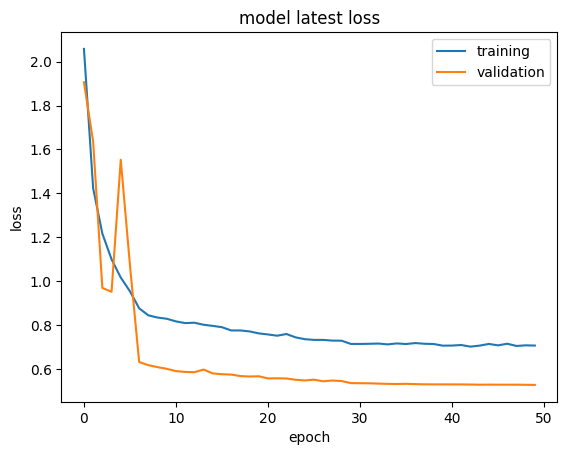

In [166]:
loss, accuracy = modellatest.evaluate(X_test, y_test, verbose=False)

plt.plot(histlatest.history['loss'])
plt.plot(histlatest.history['val_loss'])
plt.title('model latest loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

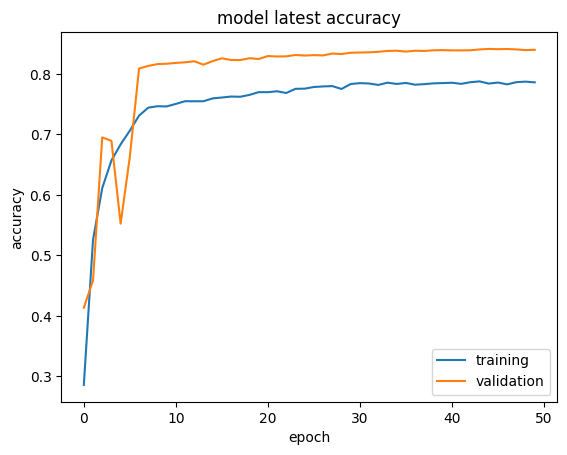

In [167]:
loss, accuracy = modellatest.evaluate(X_test, y_test, verbose=False)

plt.plot(histlatest.history['accuracy'])
plt.plot(histlatest.history['val_accuracy'])
plt.title('model latest accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

***#Summary - Insights <br/>***
1. We can observe that after fine tunning the hyper parameters the validation loss is going down and almost constant at 0.3 and training is at 0.6
3. Also we achieved higher accuracy score (84%) for test rather than training not overfitting.